# 다중회귀와 규제

## p.15

In [7]:
import pandas as pd
import seaborn as sns

print(pd.__version__)
print(sns.__version__)

1.5.3
0.12.2


In [2]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0         

In [3]:
print('기대수명 데이터의 개요:')
print(life.describe())

기대수명 데이터의 개요:
              Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.0

In [4]:
print('life 데이터의 컬럼들')
print(life.columns)

life 데이터의 컬럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [5]:
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## p.18 시본 라이브러리와 상관행렬을 이용해서 살펴보기

C:\Users\User\AppData\Local\Temp\ipykernel_15196\3920660478.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = life.corr().round(2)


<Axes: >

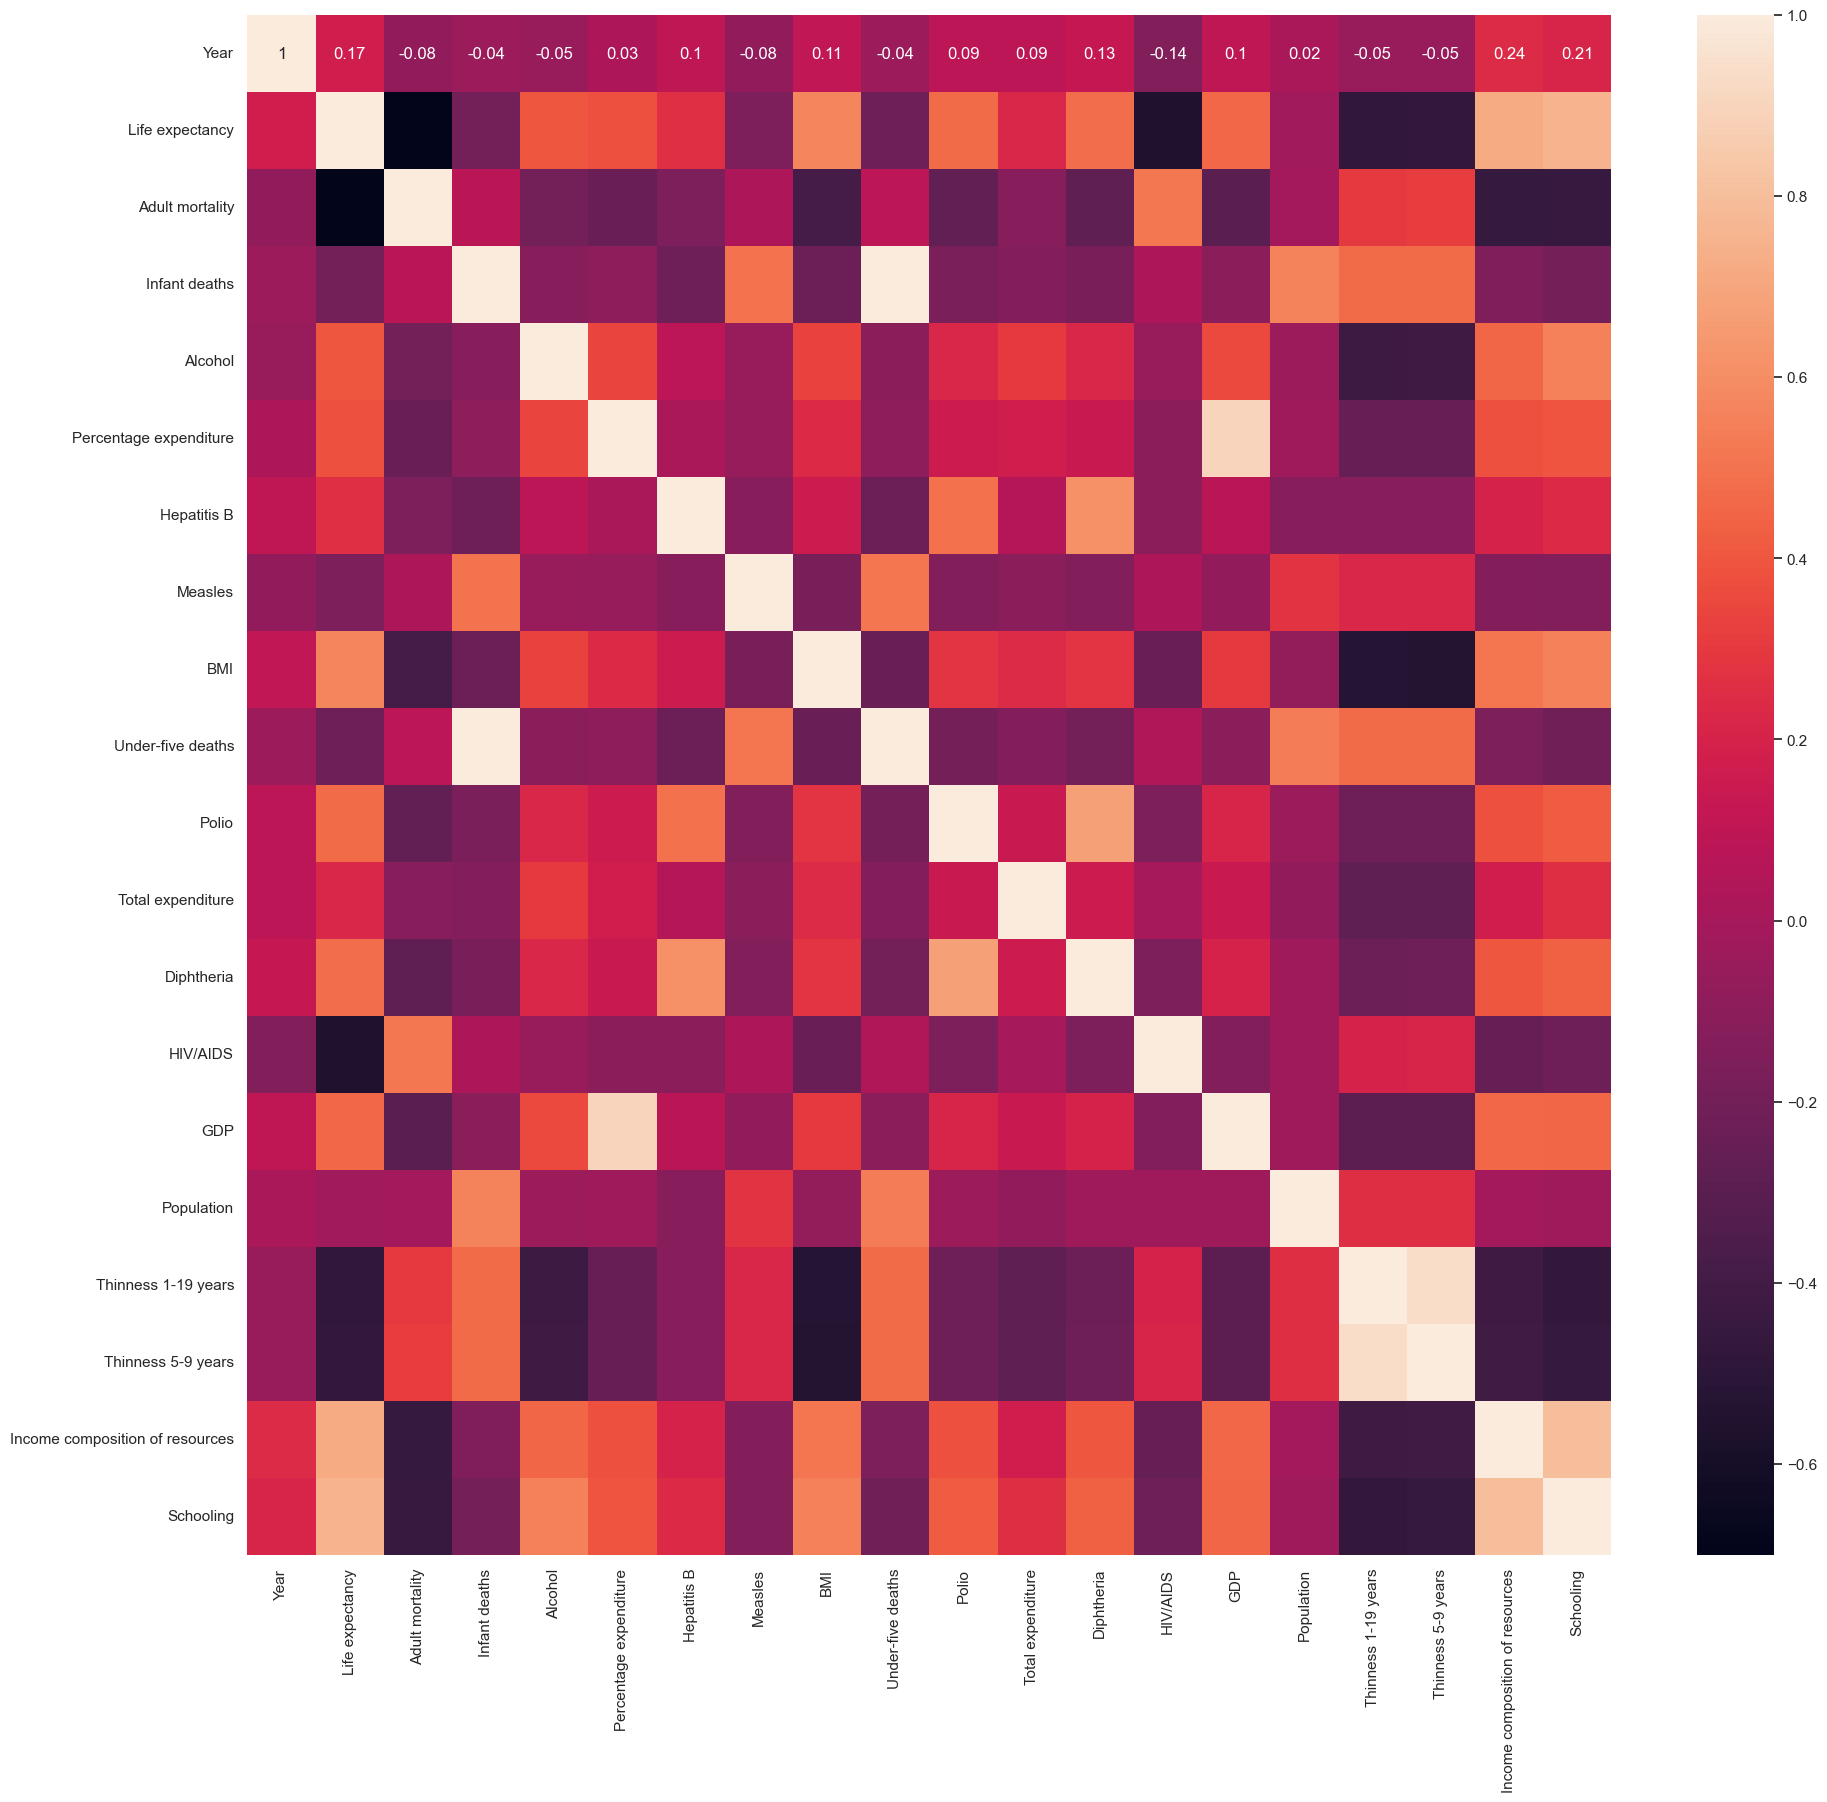

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#시본 라이브러리의 크기 지정
sns.set(rc={'figure.figsize':(22,20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<Axes: >

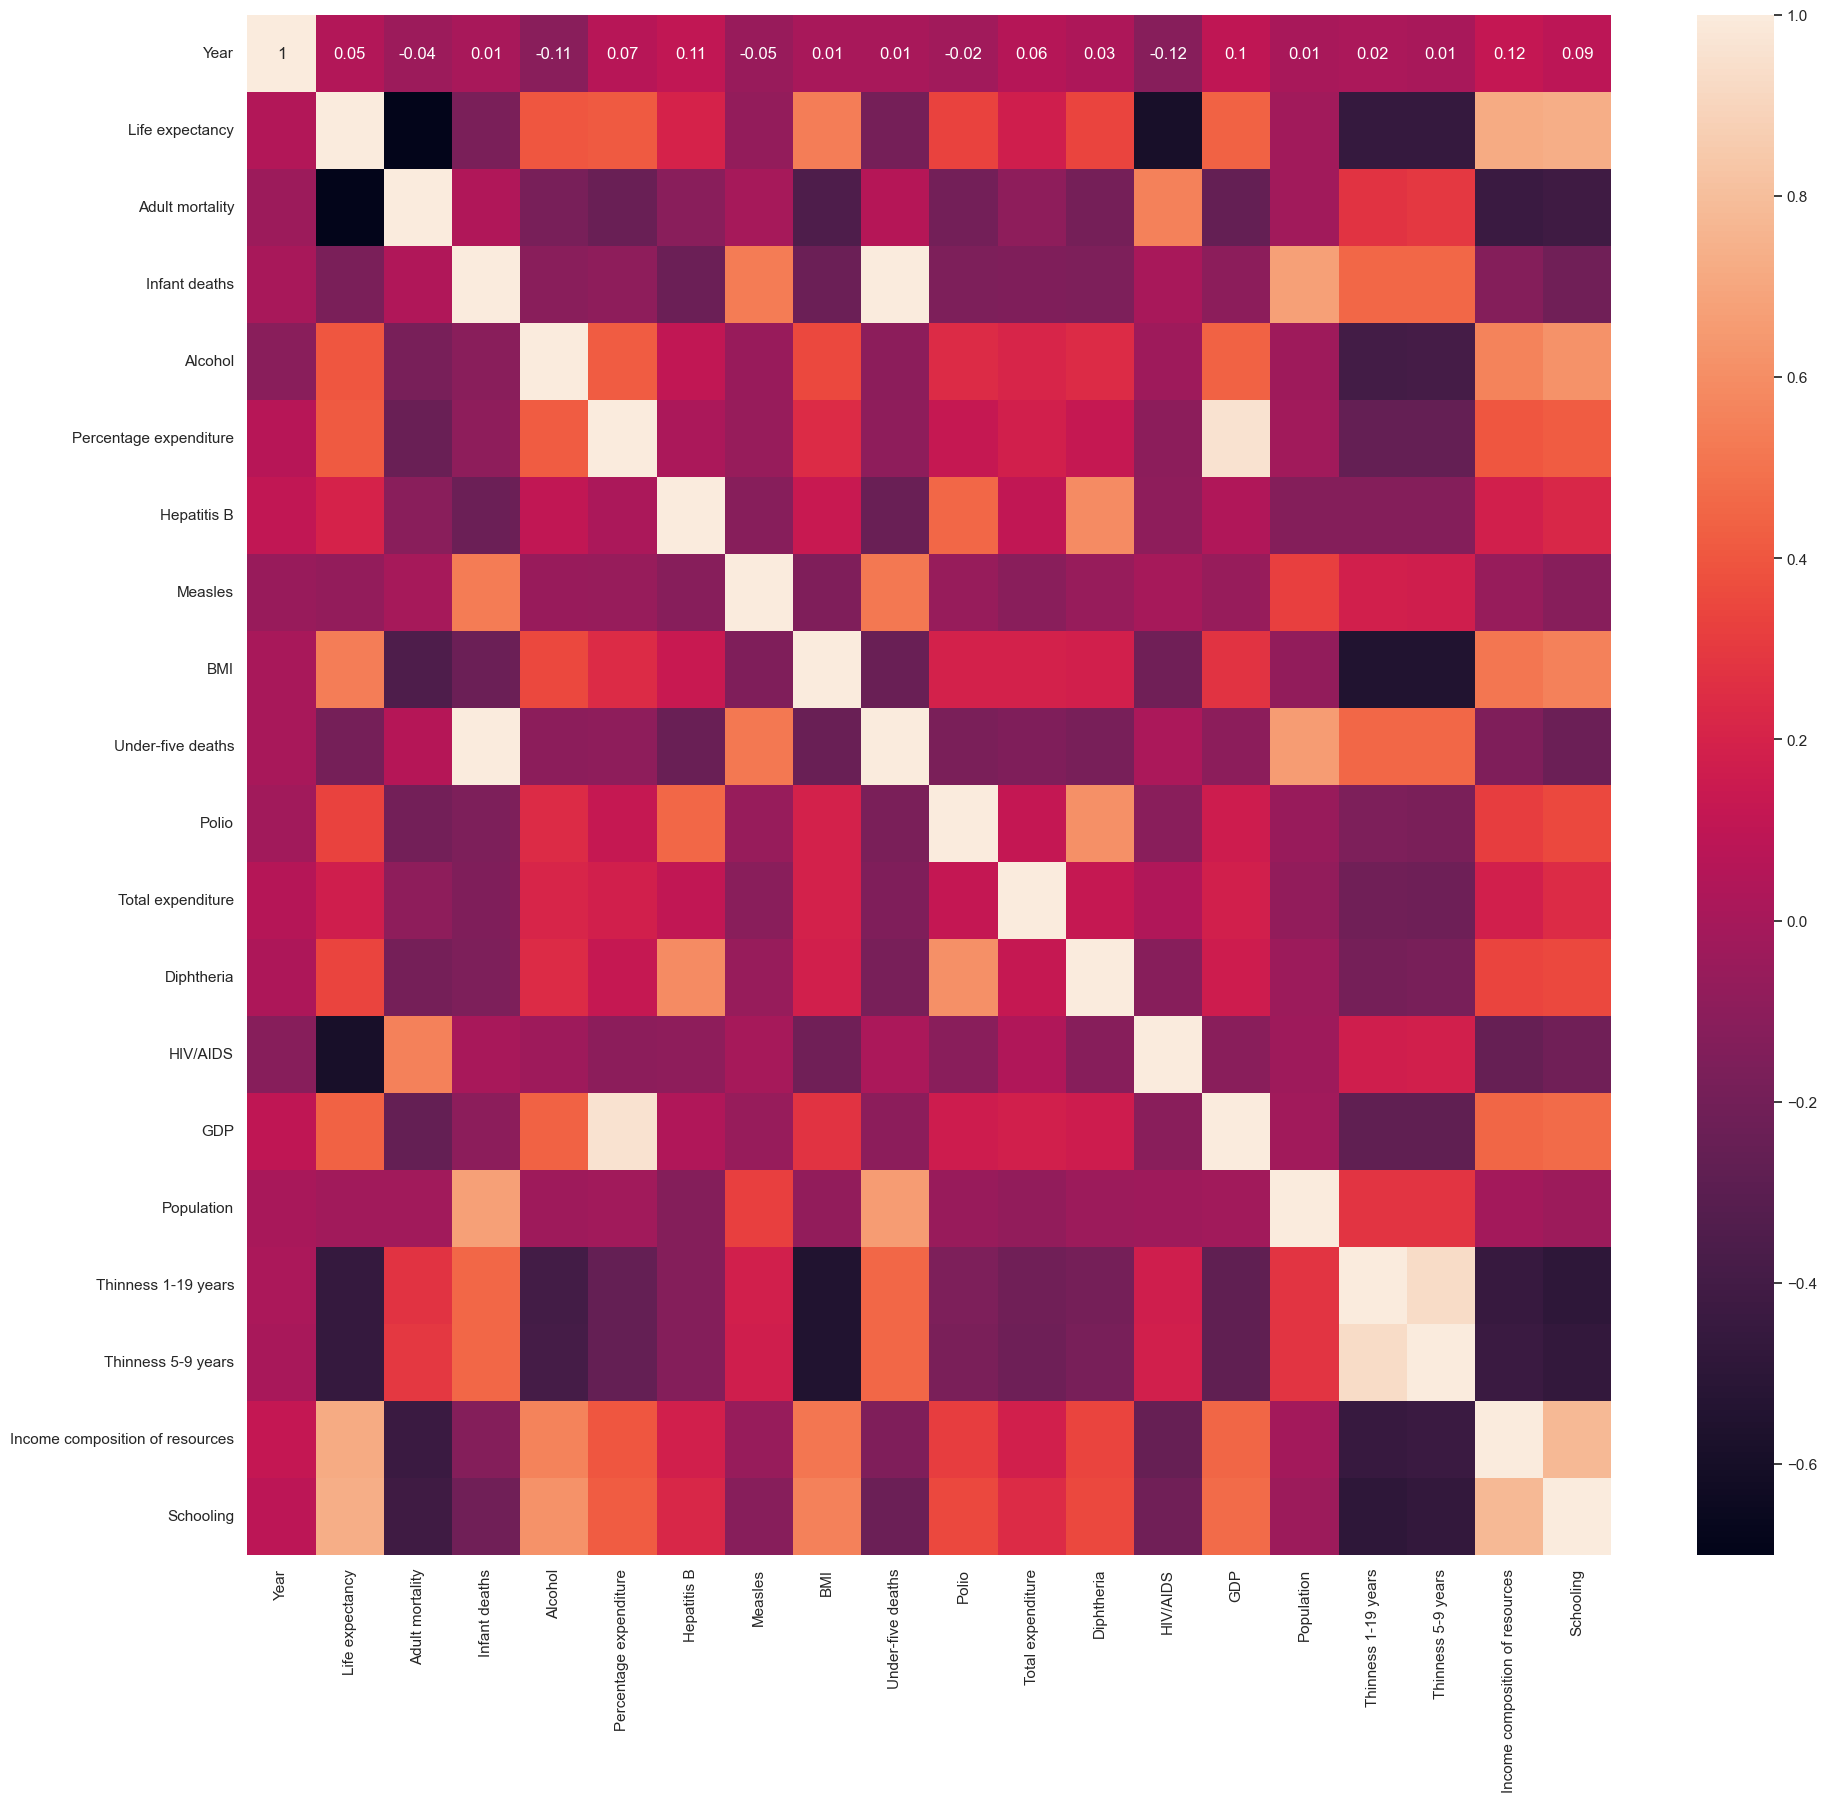

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#시본 라이브러리의 크기 지정
sns.set(rc={'figure.figsize':(22,20)})
num_life = life.select_dtypes(include=[np.number])
correlation_matrix = num_life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
sns.__version__

'0.12.2'

In [9]:
correlation_matrix

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.00,0.17,-0.08,-0.04,-0.05,0.03,0.10,-0.08,0.11,-0.04,0.09,0.09,0.13,-0.14,0.10,0.02,-0.05,-0.05,0.24,0.21
Life expectancy,0.17,1.00,-0.70,-0.20,0.40,0.38,0.26,-0.16,0.57,-0.22,0.47,0.22,0.48,-0.56,0.46,-0.02,-0.48,-0.47,0.72,0.75
Adult mortality,-0.08,-0.70,1.00,0.08,-0.20,-0.24,-0.16,0.03,-0.39,0.09,-0.27,-0.12,-0.28,0.52,-0.30,-0.01,0.30,0.31,-0.46,-0.45
Infant deaths,-0.04,-0.20,0.08,1.00,-0.12,-0.09,-0.22,0.50,-0.23,1.00,-0.17,-0.13,-0.18,0.03,-0.11,0.56,0.47,0.47,-0.15,-0.19
Alcohol,-0.05,0.40,-0.20,-0.12,1.00,0.34,0.09,-0.05,0.33,-0.11,0.22,0.30,0.22,-0.05,0.35,-0.04,-0.43,-0.42,0.45,0.55
Percentage expenditure,0.03,0.38,-0.24,-0.09,0.34,1.00,0.02,-0.06,0.23,-0.09,0.15,0.17,0.14,-0.10,0.90,-0.03,-0.25,-0.25,0.38,0.39
Hepatitis B,0.10,0.26,-0.16,-0.22,0.09,0.02,1.00,-0.12,0.15,-0.23,0.49,0.06,0.61,-0.11,0.08,-0.12,-0.12,-0.12,0.20,0.23
Measles,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.12,1.00,-0.18,0.51,-0.14,-0.11,-0.14,0.03,-0.08,0.27,0.22,0.22,-0.13,-0.14
BMI,0.11,0.57,-0.39,-0.23,0.33,0.23,0.15,-0.18,1.00,-0.24,0.28,0.24,0.28,-0.24,0.30,-0.07,-0.53,-0.54,0.51,0.55
Under-five deaths,-0.04,-0.22,0.09,1.00,-0.11,-0.09,-0.23,0.51,-0.24,1.00,-0.19,-0.13,-0.20,0.04,-0.11,0.54,0.47,0.47,-0.16,-0.21


In [10]:
print('기대수명과의 상관계수')
print(num_life.corr().round(3)['Life expectancy'])

기대수명과의 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [11]:
c = num_life.corr().round(2)['Life expectancy']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:8])

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

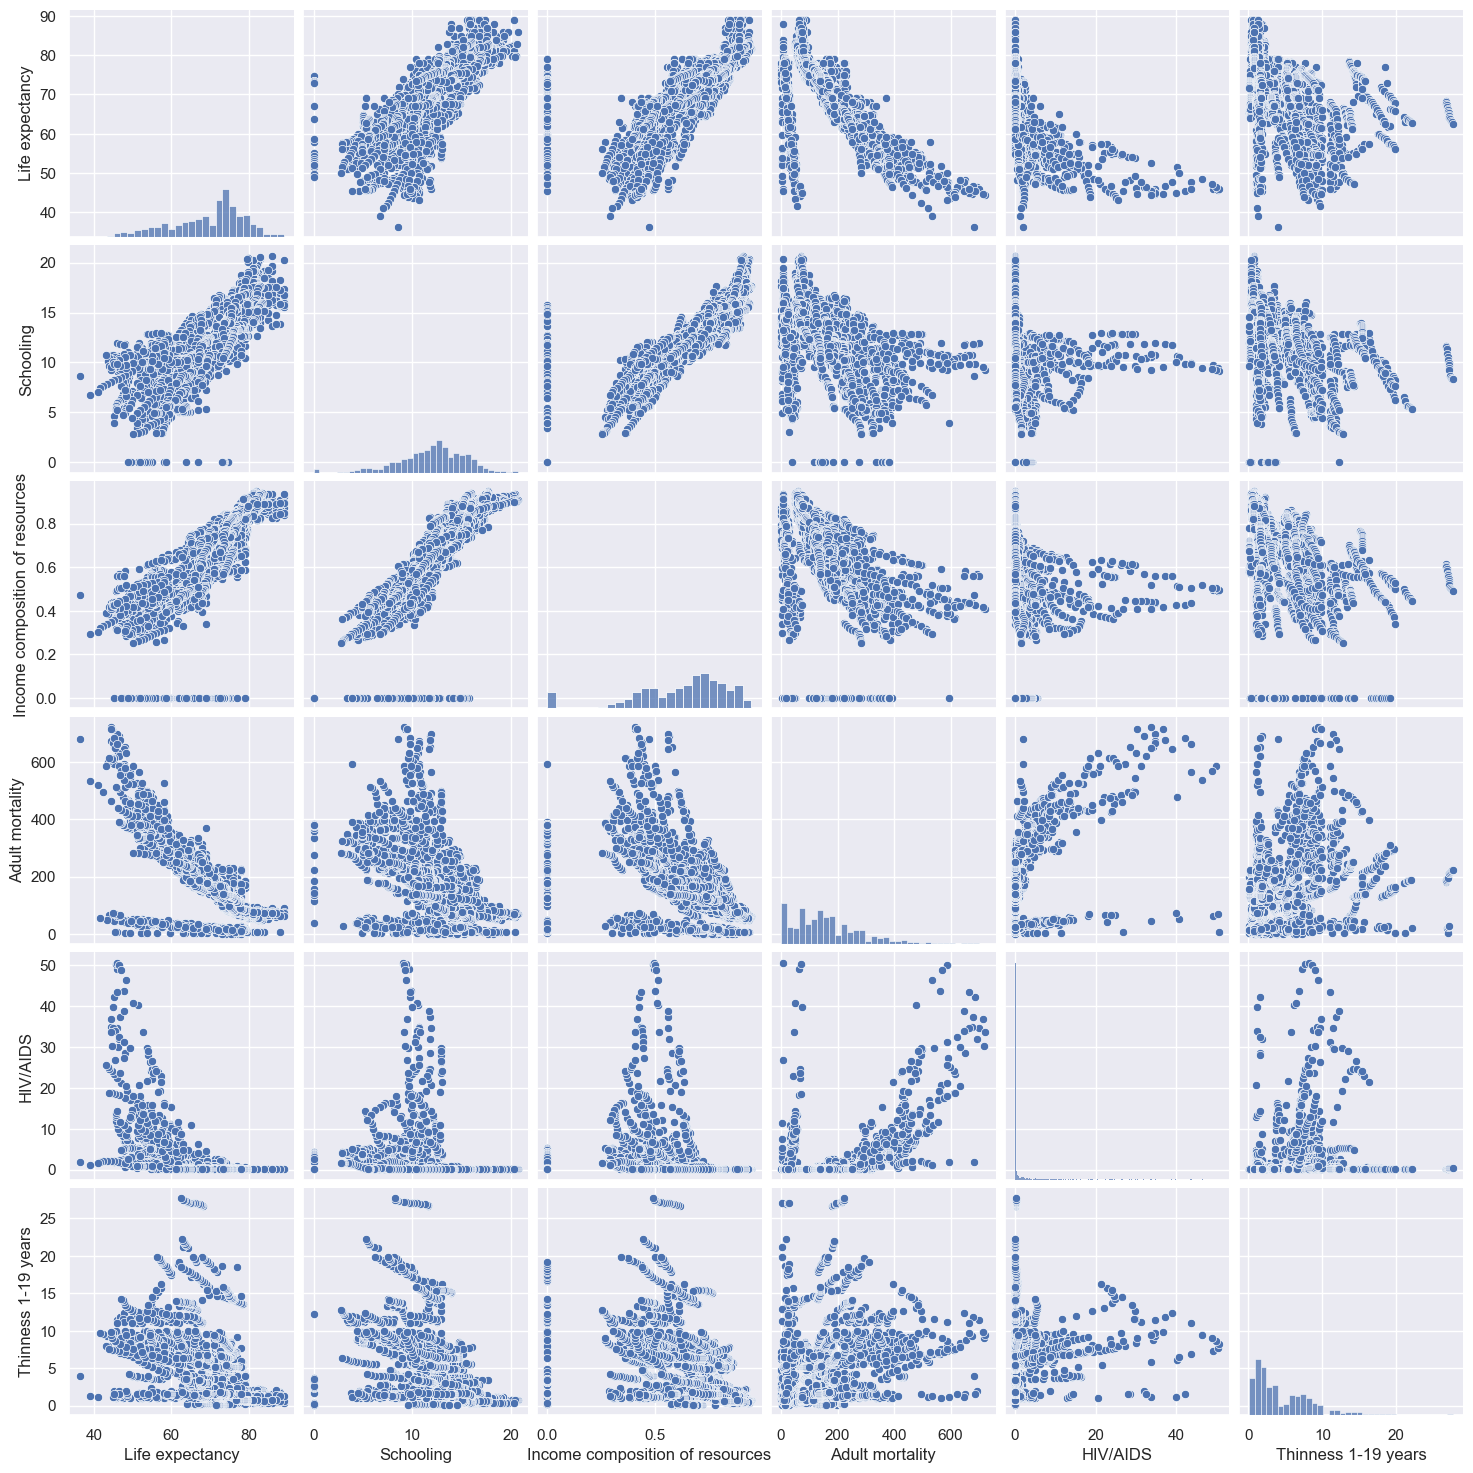

In [12]:
sns.pairplot(num_life[['Life expectancy', 'Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']])
plt.show()

In [13]:
num_life[['Life expectancy', 'Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']].isna().sum()

Life expectancy                     10
Schooling                          163
Income composition of resources    167
Adult mortality                     10
HIV/AIDS                             0
Thinness 1-19 years                 34
dtype: int64

In [14]:
num_life.dropna(inplace=True) #결측값 제거

#특징은 5가지
X = num_life[['Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
#참값은 기대수명.
y = num_life['Life expectancy']

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형 회귀 모델의 점수 = 0.798


# p.32

In [16]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'
life = pd.read_csv(file)

life.dropna(inplace=True)

In [17]:
life.head(3)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [18]:
X = life[['Year','Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형 회귀 모델의 점수 = 0.834


In [20]:
c = num_life.corr()['Life expectancy']
c = np.abs(c)
c.sort_values(ascending=True, inplace=True)
c = c[:-1] #Life Expectancy 제거

Text(0, 0.5, 'Correlation Coef')

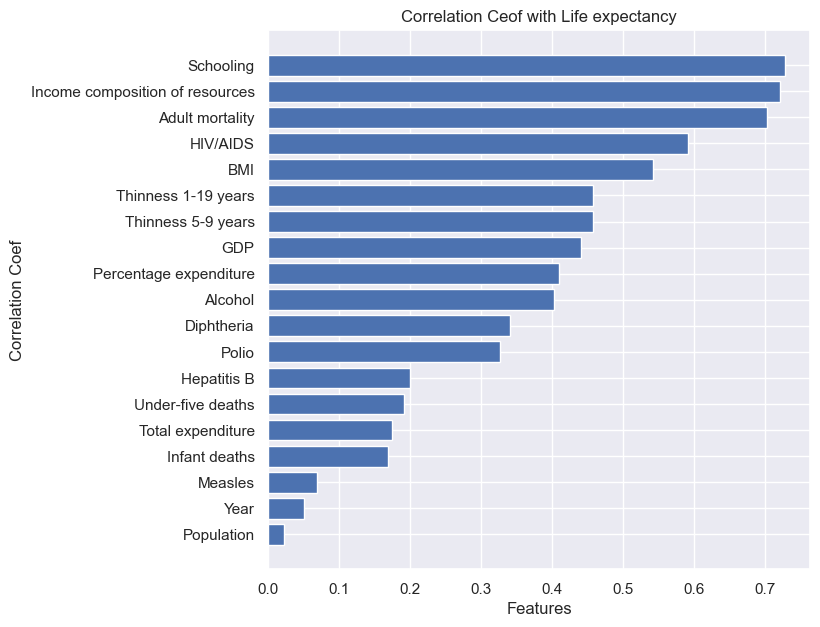

In [30]:
plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Ceof with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')

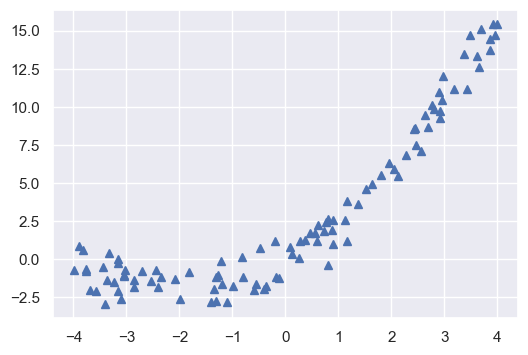

In [37]:
import numpy as np
import matplotlib.pyplot as plt

m = 100 # 생성할 데이터의 개수
#평균값이 0이고 -4에서 4 사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4

# y= 0.5X^ + 2x + 1
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X * 1 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b^") #파랑b 삼각형^ 모양으로.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()
regr.fit(X, y)
print('선형 회귀 모델의 점수=', regr.score(X, y).round(3))
print('선형 회귀 모델의 계수와 절편=', regr.coef_, regr.intercept_)

선형 회귀 모델의 점수= 0.761
선형 회귀 모델의 계수와 절편= [[1.94849207]] [3.0041443]


## 데이터 분포는 2차원 방정식 모양인데, 1차 방정식 형태의 모델로 해석해서 많은 오차 발생

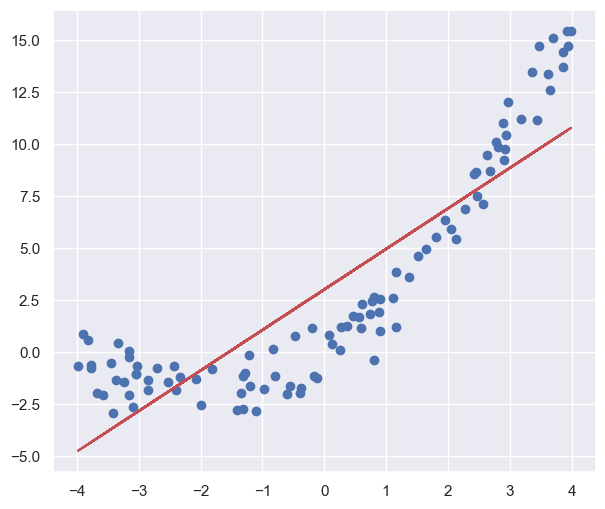

In [39]:
plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X, y)
plt.plot(X.flatten(), y_predict, color='r')

## 도전문제 8.2 3차 방정식을 이용한 데이터 생성과 시각화

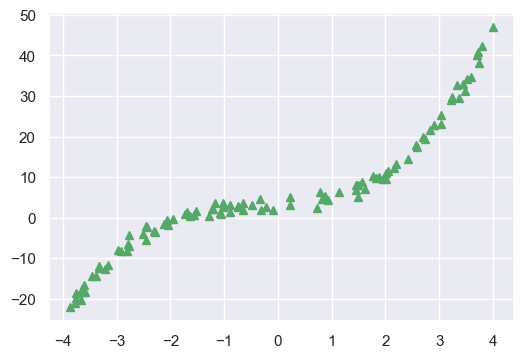

In [60]:
m = 100 # 생성할 데이터의 개수
#평균값이 0이고 -4에서 4 사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4

# y= 0.5X3 + 0.5x2 + x + 3
y = 0.5 * X ** 3 + 0.5 * X ** 2 + X + 3 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "g^")

# 다항 회귀 모델

In [61]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1, 1) #간단한 샘플 데이터 X 생성
X

array([[0],
       [1]])

In [62]:
poly = PolynomialFeatures() # default degree = 2
X = poly.fit_transform(X)

In [63]:
print(X)

[[1. 0. 0.]
 [1. 1. 1.]]


In [64]:
print(poly.get_feature_names_out())

['1' 'x0' 'x0^2']
